# Interpolation with Fourier transforms

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import deft

Consider a simple cubic lattice (with unit spacing) together with the three-dimensional function

$$
w(\mathbf{r}) = \cos (4\pi x) ,
$$

which has the periodicity of the lattice but varies only in the $x$ direction.

Suppose that the analytical form of $w(\mathbf{r})$ is not known, but that values of $w(\mathbf{r})$ on a coarse grid _are_ available. With Fourier transforms, one can reconstruct $w(\mathbf{r})$ _exactly_ based on these discrete samples—and, more importantly, the same is true for nearly any periodic function (with a few caveats).

DEFT provides tools for this sort of analysis, as demonstrated by the code below.

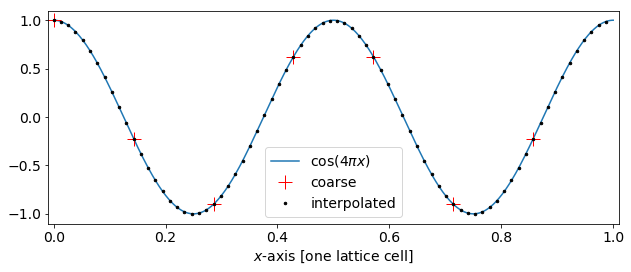

In [2]:
grd_pts = 7     # for coarse grid
grd_pts_2 = 77  # for dense grid

# create f(r) = cos(4*pi*x) on coarse grid
data = np.zeros([grd_pts, grd_pts, grd_pts])
for i in range(grd_pts):
    data[i,:,:] = np.cos(4.0*np.pi*float(i)/grd_pts)

# perform interpolation
ax = [1.0,0.0,0.0];  ay = [0.0,1.0,0.0];  az = [0.0,0.0,1.0]
data_dense = deft.fourier_interpolate(data, grd_pts_2, grd_pts_2, grd_pts_2, ax, ay, az)    

# plot
x = np.linspace(0,1,500)
plt.rc('font', size=14)
fig = plt.figure(figsize=[9,4])
plt.plot(x, np.cos(4.0*np.pi*x))
plt.plot(np.arange(grd_pts)/grd_pts, data[:,0,0], 'r+', markersize=14)
plt.plot(np.arange(grd_pts_2)/grd_pts_2, data_dense[:,0,0], 'k.', markersize=5)
plt.xlim([-0.01, 1.01])
plt.xlabel('$x$-axis [one lattice cell]')
plt.legend(['cos$(4\pi x)$', 'coarse', 'interpolated'])
plt.tight_layout()
plt.show()

In the plot, the function $w(\mathbf{r})$ is shown along the $x$-axis of the simple cubic lattice. The + signs are the values of $w(\mathbf{r})$ on a coarse grid; based on these data, DEFT generates the dotted line with Fourier-transform-driven interpolation.